In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [49]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df = df.drop(columns= "CustomerID")
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [51]:
print(df.isnull().values.any())

False


/tmp/ipython-input-1043377665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


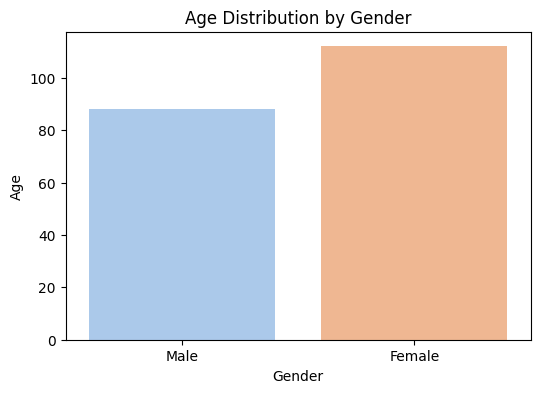

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()


For this visualization as we can see, In this gender distribution, there are more female then male

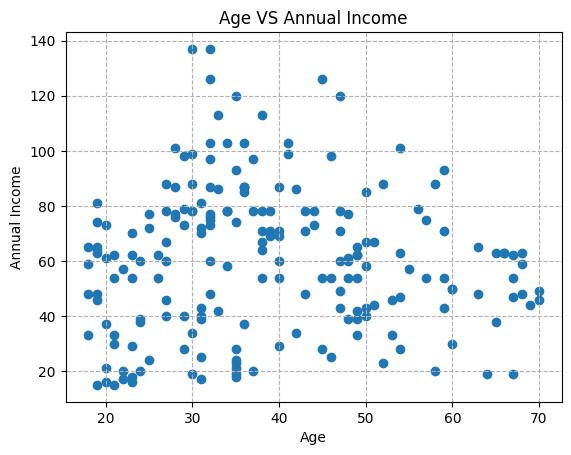

In [28]:
plt.scatter(df['Age'], df['Annual Income'])
plt.title('Age VS Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(axis='both', linestyle='--')
plt.show()

Highest income by age in this visualization are around 30-50 years old

/tmp/ipython-input-2781242178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Spending Score', data=avg_spending, palette='Set2')


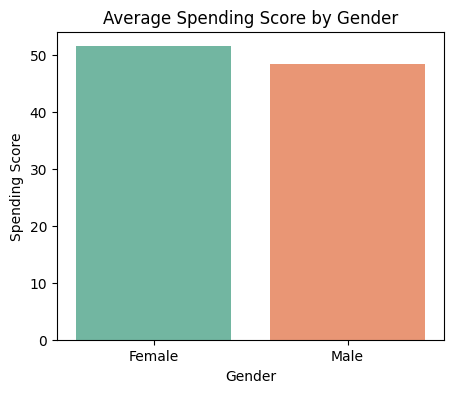

In [29]:
plt.figure(figsize=(5,4))
avg_spending = df.groupby('Gender')['Spending Score'].mean().reset_index()
sns.barplot(x='Gender', y='Spending Score', data=avg_spending, palette='Set2')
plt.title('Average Spending Score by Gender')
plt.show()


By gender, female give more values then male cause their spending is more then male

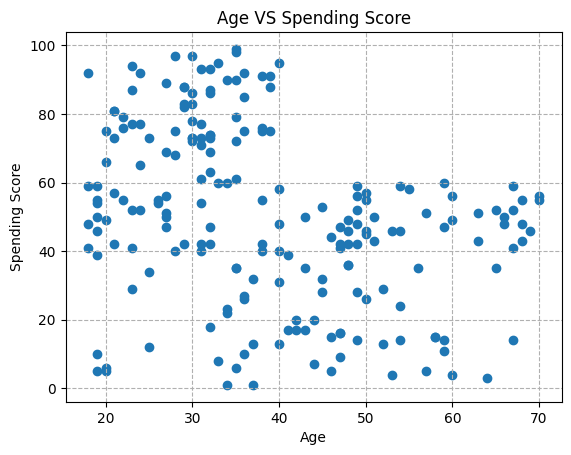

In [30]:
plt.scatter(df['Age'], df['Spending Score'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

In [52]:
# create new dataframe that consist only annual income and spending score
df_2 = df.copy()
df_2 = df[['Annual Income', 'Spending Score']]
df_2.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Encoding

In [54]:
df_encoding = df.copy()
df_encoding['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df_encoding.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


now we have dataframe which is already encoded

# Data Scaling (Choose One)

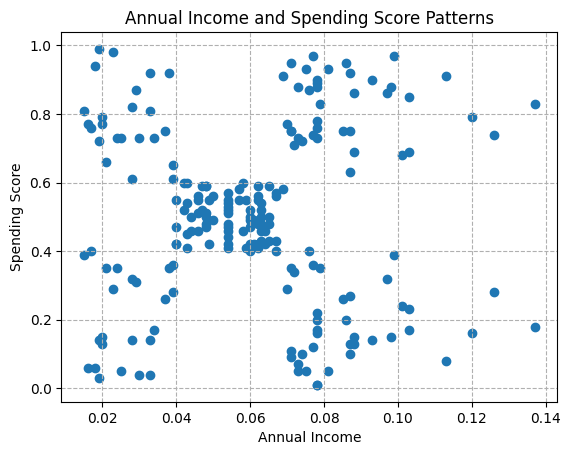

In [55]:
# scale dataset with decimal scaling
def decimal_scaling(df):
  normalized_df = df.copy()
  for column in df.columns:
    j = 0
    max_value = df[column].max()
    while max_value > 1:
      max_value /= 10
      j += 1
    normalized_df[column] = df[column] / (10 ** j)
  return normalized_df

# Example usage:
df_decimal_scaled = decimal_scaling(df_2)

df_decimal_scaled.head()

# visualization
plt.scatter(df_decimal_scaled["Annual Income"], df_decimal_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

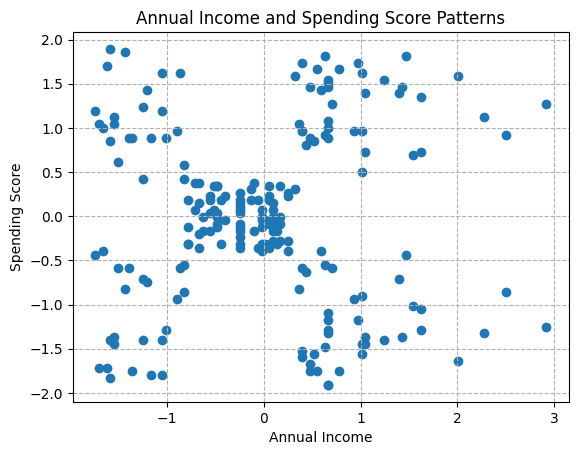

In [37]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df_2), columns=["Annual Income", "Spending Score"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Annual Income"], df_sc_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd


# --- Apply Min-Max Scaling ---
scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(
    scaler.fit_transform(df_encoding),
    columns=['Gender', 'Age', 'Annual Income', 'Spending Score']
)

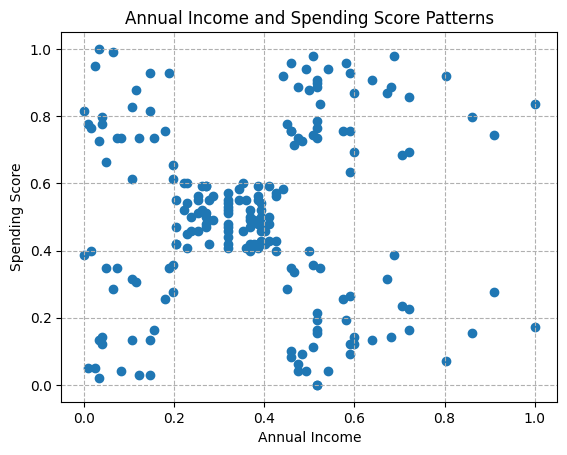

In [59]:
# visualization
plt.scatter(df_minmax_scaled["Annual Income"], df_minmax_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

Now we already have 3 scale dataset, but i will choose just one scale then I'll choose **MinMaxScaler**

# K-Means Clustering

In [61]:
from sklearn.cluster import KMeans

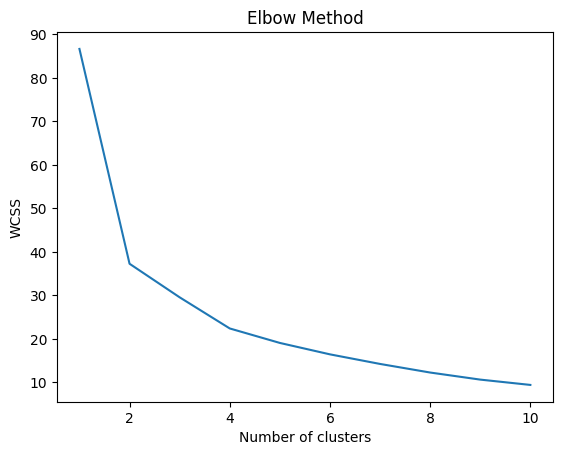

In [62]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  86.681482
1                   2  37.272272
2                   3  29.552858
3                   4  22.390960
4                   5  19.060907
5                   6  16.434553
6                   7  14.229306
7                   8  12.253159
8                   9  10.625832
9                  10   9.403891


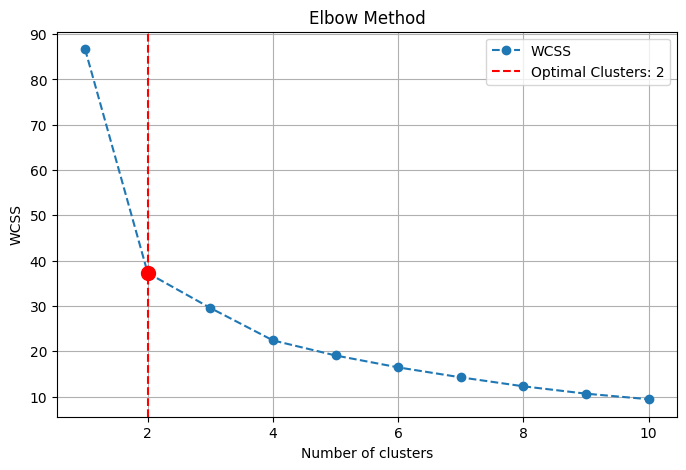

The optimal number of clusters is: 2


In [64]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [67]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


/tmp/ipython-input-4254251878.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


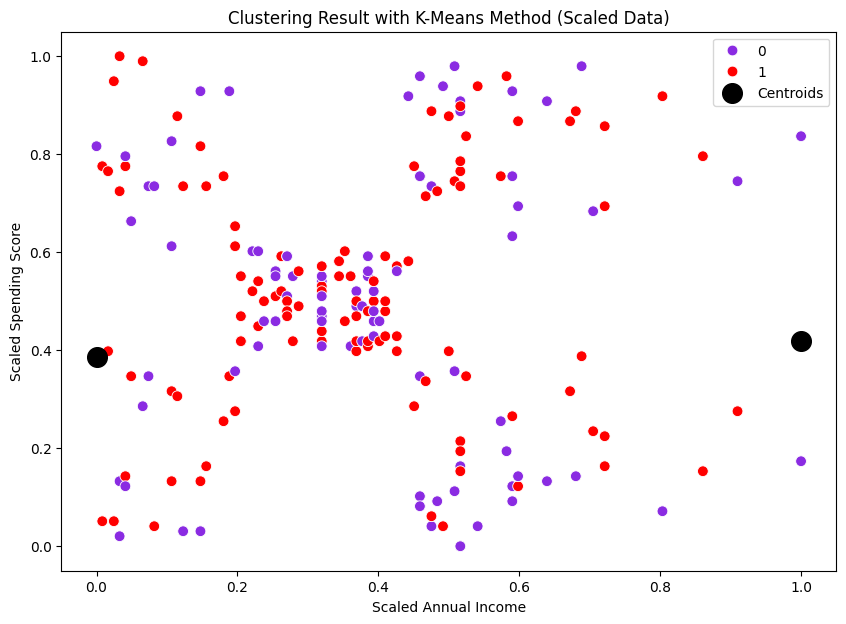

In [70]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

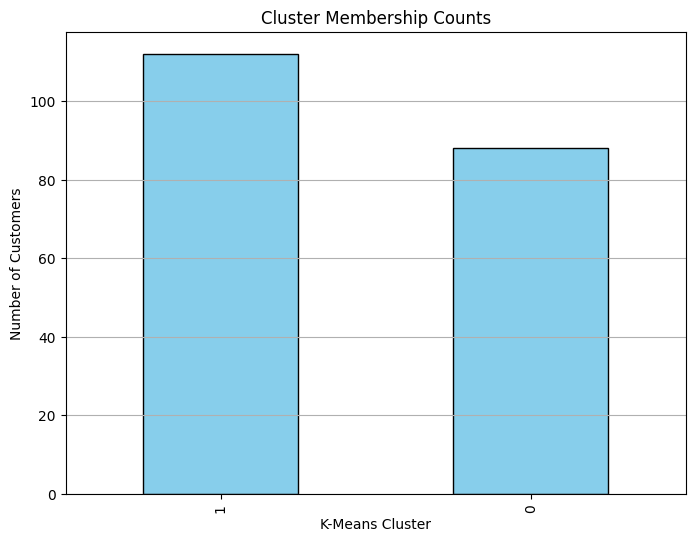

In [71]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [81]:
# Pastikan Cluster sudah ditambahkan
df_encoding['Cluster'] = clusters

# Buat ringkasan tiap cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max'],
    'Gender': lambda x: x.mode()[0] if not x.mode().empty else None
})

cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Tampilkan hasil
print(cluster_summary)


                      Age         Annual Income          Spending Score      \
                     mean min max          mean min  max           mean min   
KMeans_Cluster                                                                
0               39.806818  18  70     62.227273  15  137      48.511364   1   
1               38.098214  18  68     59.250000  16  126      51.526786   5   

                     Gender  
               max <lambda>  
KMeans_Cluster               
0               97     Male  
1               99   Female  


**Cluster 0“The Practical Professionals” (Male-Dominant)**
This cluster consists mostly of male customers around 40 years old. They tend to have a slightly higher annual income compared to the other cluster but exhibit more cautious spending behavior. Their purchasing decisions are generally based on practicality and long-term value rather than trends. From a business perspective, this segment represents value-conscious professionals who prefer quality and reliability. Marketing strategies for this group should emphasize practical benefits, durability, and cost efficiency. Effective communication channels include email newsletters and professional platforms such as LinkedIn. Offering loyalty programs, extended warranties, or bulk discounts would be effective to encourage repeat purchases and strengthen trust.

**Cluster 1 – “The Social Spenders” (Female-Dominant)**
This cluster is dominated by female customers with an average age of 38, slightly younger than those in Cluster 0. They have a moderate income level but demonstrate a higher spending score, suggesting a more active and experience-oriented shopping behavior. They are more emotionally driven in their purchases and tend to be influenced by trends and social recommendations. For this segment, marketing should focus on lifestyle appeal, exclusivity, and social engagement. Suitable campaign channels include Instagram, TikTok, and influencer collaborations. Attractive offers such as flash sales, limited editions, or early access to new collections can help maintain their interest, while membership programs and referral rewards may enhance customer loyalty and advocacy.